<a href="https://colab.research.google.com/github/Muhammad-Huzaifaa/TensorFlow-/blob/main/tensorflow_Course_3_Excercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-06-18 06:04:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-06-18 06:04:05 (82.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# An LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [6]:
 history = model.fit(predictors, label, epochs=10, verbose=1)

Epoch 1/10
484/484 [==============================] - 55s 113ms/step - loss: 0.7495 - accuracy: 0.8077
Epoch 2/10
484/484 [==============================] - 54s 112ms/step - loss: 0.7337 - accuracy: 0.8117
Epoch 3/10
484/484 [==============================] - 57s 117ms/step - loss: 0.7147 - accuracy: 0.8122
Epoch 4/10
484/484 [==============================] - 54s 112ms/step - loss: 0.7093 - accuracy: 0.8139
Epoch 5/10
484/484 [==============================] - 54s 112ms/step - loss: 0.6806 - accuracy: 0.8206
Epoch 6/10
484/484 [==============================] - 55s 114ms/step - loss: 0.6681 - accuracy: 0.8250
Epoch 7/10
484/484 [==============================] - 54s 112ms/step - loss: 0.6780 - accuracy: 0.8186
Epoch 8/10
484/484 [==============================] - 54s 112ms/step - loss: 0.6814 - accuracy: 0.8177
Epoch 9/10
484/484 [==============================] - 54s 111ms/step - loss: 0.6589 - accuracy: 0.8236
Epoch 10/10
484/484 [==============================] - 55s 113ms/step - l

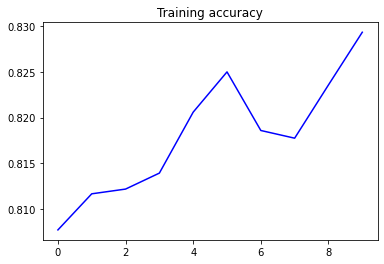

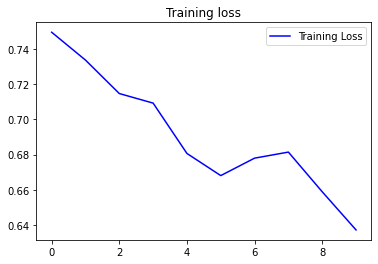

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		#if index == predicted:
			output_word = word
			#break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools cools


In [ ]:
-----